In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/campusx-official/placement-project-logistic-regression/refs/heads/main/placement.csv')


In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape
#data of 100 data, 4rows

(100, 4)

In [5]:
#steps
#preprocess + EDA+  feature Selection
#extract inpu and output cols
#scale the values
#train test split
#evaluate the model /model selection
#deploy the model

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [7]:
#remove the unnecessary column,ie: unnamed, step 1 of preprocessing
df= df.iloc[:,1:] #using  iloc tofilter.

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
#For EDA(exploratory data analysis, we look through the data)
import matplotlib.pyplot as plt

Text(0, 0.5, 'iq')

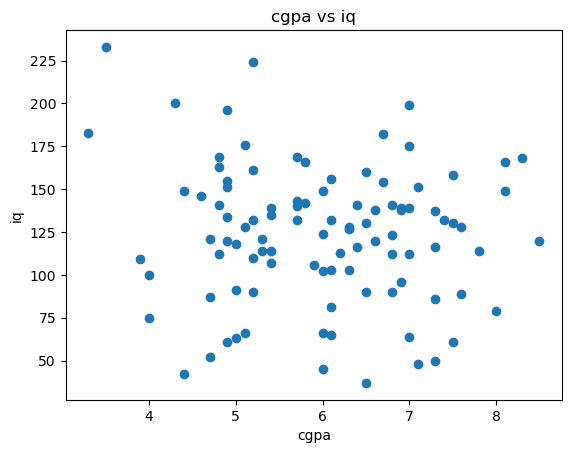

In [22]:
plt.scatter(df['cgpa'],df['iq'])
plt.title('cgpa vs iq')
plt.xlabel('cgpa')
plt.ylabel('iq')

Text(0.5, 1.0, 'Scatter plot of cgpa and iq')

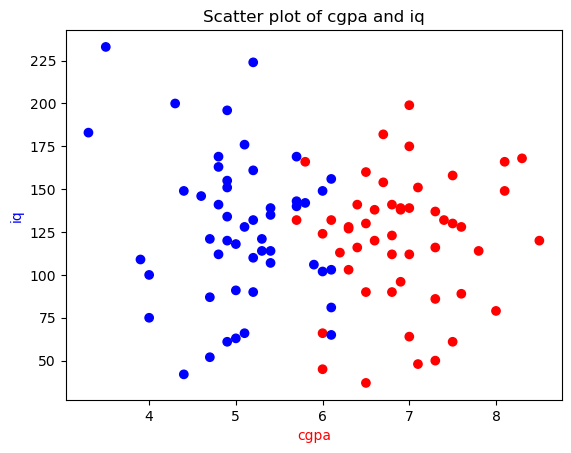

In [ ]:
# plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.scatter(df['cgpa'],df['iq'],c=df['placement'].apply(lambda x: 'red' if x==1 else 'blue'))
plt.xlabel('cgpa',color='red')
plt.ylabel('iq',color='blue')

plt.title('Scatter plot of cgpa and iq')

In [25]:
#the red dots are the students who had placements
#the blue dots are the students who didn't had placements
df.head()


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


### this is how we seperate the feature columns (input of model) and target (output of mode) columns

In [32]:
#variables to independent variables,ie cgpa and iq
#X= df.iloc[:,0:2] #for all rows, ie column cgpa and  iq
#variable to store dependent variable,   ie placements
#Y=df.iloc[:,-1] #for all rows , only the last column


#lets train a model without normalized data and check the accuracy
#extract the feature columns
X = df.drop(columns=['placement']) # features columns
#extract the target columns
y = df['placement']  # target column
X


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
#fot this case,before scaling, we will traintest and split
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test =train_test_split(X,y,test_size=0.1)#test size 0.1,means out of 100data, 10% will goto
#testing
#90% will go for training
#X_train: Training feature data (inputs for model learning)
#X_test: Testing feature data (inputs for model evaluation)
#Y_train: Training target/label data (correct outputs for training)
#Y_test: Testing target/label data (true results to compare model predictions against)

In [15]:
#scaling
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()


In [17]:
X_train = scaler.fit_transform(X_train)




In [18]:
X_test = scaler.transform(X_test)

In [19]:
#creating a ml model to so that it understands the data and its pattern
#for this project, we are using logistic regression
#logistic regression finds and divides the data with similar pattern so that we
#can find students who had placement and didnt have placement

from sklearn.linear_model import LogisticRegression


In [20]:
clf= LogisticRegression()

In [21]:
clf.fit(X_train,Y_train)

LogisticRegression()

In [29]:
Y_pred = clf.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score
# print("MAE:", mean_absolute_error(Y_test, Y_pred))
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))

Accuracy Score: 0.9


# Ramdom prediction 
## playing with the model

In [34]:
randomm = clf.predict(scaler.transform([[2.2, 60]]))
randomm

c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)